In [1]:
import pandas as pd 
#import yfinance as yf 
from scipy.stats import spearmanr
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt 

#dict for individual stock DF storage
# stockdataframes = {}
# start_dte = "2019-01-01"
# end_dte = "2023-12-31"




In [37]:
#merge all stock dfs into one 
# full_df = pd.concat(stockdataframes.values(), keys=stockdataframes.keys())
filepath = 'Data/SP500.csv'
full_df = pd.read_csv(filepath)
#print(full_df)
#print(full_df.head())

#need to cut this to just values and tickers

#full_df = full_df.reset_index(level=0) 
#print(full_df.head())
full_df['Date'] = pd.to_datetime(full_df['Date'], utc=True)
##print(full_df.head())
#df['Date'] = pd.to_datetime(df['Date'])
#full_df.set_index('Date', inplace=True)
#print(full_df['Date'].head())

last_day_of_month = full_df['Date'] + pd.offsets.MonthEnd(0)

# Use boolean indexing to filter the DataFrame for the last day of each month
last_day_df = full_df[full_df['Date'].isin(last_day_of_month)]

# Reset the index if needed
last_day_df.reset_index(drop=True, inplace=True)

print(len(last_day_df))
print(last_day_df.head())

#new_df = df.iloc[:1000].copy()
#new_df.set_index('Date', inplace=True)
# Display the new DataFrame
#print(new_df.head())

#print(full_df.info())
#print(monthly_df)
#monthly_df = full_df.resample('M').agg(list)
#monthly_df.reset_index(drop=True, inplace=True)
#print(len(monthly_df))
#print(monthly_df)
#print(len(monthly_df))
#print(len(last_day_df))
#print(last_day_df.head())
#monthly_df.show()




20538
  Unnamed: 0                      Date       Close Symbol Security  \
0        MMM 2019-01-31 05:00:00+00:00  163.799927    MMM       3M   
1        MMM 2019-02-28 05:00:00+00:00  170.770477    MMM       3M   
2        MMM 2019-04-30 04:00:00+00:00  156.047623    MMM       3M   
3        MMM 2019-05-31 04:00:00+00:00  132.667892    MMM       3M   
4        MMM 2019-07-31 04:00:00+00:00  145.100082    MMM       3M   

   GICS Sector  
0  Industrials  
1  Industrials  
2  Industrials  
3  Industrials  
4  Industrials  


In [38]:
sp500_tickers = full_df['Symbol'].unique().tolist() 
exclude = ['BRK.B', 'BF.B', 'ABNB', 'CARR', 'CEG', 'CTVA', 'DOW', 'FOXA', 'FOX', 'GEHC', 'KVUE', 'OTIS', 'UBER', 'VLTO']
sp500_tickers = [ticker for ticker in sp500_tickers if ticker not in exclude]


In [4]:
def spearman_ranking(a):
    input_array = np.array(a)
    sorted_indices = np.argsort(-input_array)
    ranks = np.empty_like(sorted_indices)
    ranks[sorted_indices] = np.arange(1, len(input_array) + 1)
    return ranks


def spearman_coefficient(stock1, stock2):
    a = spearman_ranking(stock1)
    b = spearman_ranking(stock2)
    n = (len(a) + len(b)) / 2
    rho = 1 - (6 * np.sum((a - b)**2) / (n * (n**2 - 1)))
    return rho


In [5]:
# print(len(monthly_df))
# Calculate Spearman correlation coefficient
#corr_matrix = monthly_df.pivot(columns='Symbol', values='Close').pct_change().corr(method='spearman').dropna()
# missing_values = last_day_df['Close'].isnull().sum()
# print(missing_values)
corr_matrix = last_day_df.pivot(index='Date',columns='Symbol', values='Close').pct_change().corr(method='spearman').dropna()

print(corr_matrix.head())
print(len(corr_matrix))

Symbol         A       AAL      AAPL      ABBV       ABT      ACGL       ACN  \
Symbol                                                                         
A       1.000000  0.410279  0.504530  0.491463  0.561498  0.294077  0.655401   
AAL     0.410279  1.000000  0.305401  0.076307  0.427352  0.297735  0.322822   
AAPL    0.504530  0.305401  1.000000  0.258014  0.573171  0.284146  0.751916   
ABBV    0.491463  0.076307  0.258014  1.000000  0.155226  0.308362  0.463937   
ABT     0.561498  0.427352  0.573171  0.155226  1.000000  0.270906  0.692857   

Symbol      ADBE       ADI       ADM  ...      WYNN       XEL       XOM  \
Symbol                                ...                                 
A       0.479443  0.565331  0.527875  ...  0.347909  0.331185  0.295819   
AAL     0.237631  0.556620  0.421429  ...  0.554530 -0.126481  0.503833   
AAPL    0.707666  0.487631  0.469512  ...  0.433798  0.348955  0.140767   
ABBV    0.175610  0.275958  0.443902  ...  0.254530  0.164111  0

In [6]:
print(corr_matrix.head())

Symbol         A       AAL      AAPL      ABBV       ABT      ACGL       ACN  \
Symbol                                                                         
A       1.000000  0.410279  0.504530  0.491463  0.561498  0.294077  0.655401   
AAL     0.410279  1.000000  0.305401  0.076307  0.427352  0.297735  0.322822   
AAPL    0.504530  0.305401  1.000000  0.258014  0.573171  0.284146  0.751916   
ABBV    0.491463  0.076307  0.258014  1.000000  0.155226  0.308362  0.463937   
ABT     0.561498  0.427352  0.573171  0.155226  1.000000  0.270906  0.692857   

Symbol      ADBE       ADI       ADM  ...      WYNN       XEL       XOM  \
Symbol                                ...                                 
A       0.479443  0.565331  0.527875  ...  0.347909  0.331185  0.295819   
AAL     0.237631  0.556620  0.421429  ...  0.554530 -0.126481  0.503833   
AAPL    0.707666  0.487631  0.469512  ...  0.433798  0.348955  0.140767   
ABBV    0.175610  0.275958  0.443902  ...  0.254530  0.164111  0

In [52]:
# Using 1 / correlation for weight
def create_base_network(corr_coef, corr_matrix, sp500_tickers):
    #create graph 
    G = nx.Graph() 

    for stock in sp500_tickers: 
        G.add_node(stock) 
        
    #add links 
    for i in range(len(sp500_tickers)): 
        for j in range(i + 1, len(sp500_tickers)):
            stock1 = sp500_tickers[i]
            stock2 = sp500_tickers[j]
            
            # Check if the stock symbols are present in the correlation matrix

            # CHANGED CORRELATION THRESHOLD TO THIS IF BLOCK
            if stock1 in corr_matrix.index and stock2 in corr_matrix.columns:
                correlation_coefficient = corr_matrix.loc[stock1, stock2]
                if not np.isnan(correlation_coefficient) and abs(correlation_coefficient) > corr_coef:
                    G.add_edge(stock1, stock2, weight= 1 / correlation_coefficient)
    return G

# Using 1 / correlation for weight
def create_sector_network(corr_coef, corr_matrix, sp500_tickers, sector_df, valid_sectors_array):
    #create graph 
    G = nx.Graph() 

    for stock in sp500_tickers: 
        if stock in sector_df['Symbol'].values:
            sector = sector_df.loc[sector_df['Symbol'] == stock, 'GICS Sector'].iloc[0]
            if sector in valid_sectors_array:
                G.add_node(stock, sector = sector) 
        
    node_list = list(G.nodes())
    #add links 
    for i in range(len(sp500_tickers)): 
        for j in range(i + 1, len(sp500_tickers)):
            stock1 = sp500_tickers[i]
            stock2 = sp500_tickers[j]
            # Check if the stock symbols are present in the correlation matrix
            if (stock1 not in node_list) or (stock2 not in node_list):
                continue
            # CHANGED CORRELATION THRESHOLD TO THIS IF BLOCK
            if stock1 in corr_matrix.index and stock2 in corr_matrix.columns:
                correlation_coefficient = corr_matrix.loc[stock1, stock2]
                if not np.isnan(correlation_coefficient) and abs(correlation_coefficient) > corr_coef:
                    G.add_edge(stock1, stock2, weight= 1 / correlation_coefficient)
    return G

# This function works for daily but not monthly
def dataframe_creation(time_step, start_date, end_date):
    # Read in all the stock data
    filepath = 'Data/SP500.csv'
    full_df = pd.read_csv(filepath)

    # Ensure all Dates are in proper format
    full_df['Date'] = pd.to_datetime(full_df['Date'], utc=True)
    start_date = pd.to_datetime(start_date, utc=True)
    end_date = pd.to_datetime(end_date, utc=True)

    ranged_df = full_df[(full_df['Date'] >= start_date) & (full_df['Date'] <= end_date)]

    # This doesn't work
    if time_step == 'm':
        return get_monthly_df(ranged_df)

    if time_step == 'd':
        return ranged_df

    return 0

# THIS FUNCTION DOES NOT WORK PROPERLY
def get_monthly_df(passed_df):
    # Use boolean indexing to filter the DataFrame for the last day of each month
    last_day = passed_df['Date'] + pd.offsets.MonthEnd(0)
    last_day_df = passed_df[passed_df['Date'].isin(last_day)]

    # Reset the index if needed
    last_day_df.reset_index(drop=True, inplace=True)

    # print(len(last_day_df))
    # print(last_day_df.head())

    return last_day_df

def get_corr_matrix(df):
    return df.pivot(index='Date',columns='Symbol', values='Close').pct_change().corr(method='spearman').dropna()

# Sectors are :
#   Industrials, Health Care, Information Technology, Utilities, Financials, Materials
#   , Real Estate, Communication Services, Consumer Staples, Consumer Discretionary
#   , Energy
def get_sector_df(df):
    return_df = df[['Symbol', 'GICS Sector']]
    return_df = return_df.drop_duplicates(subset=['Symbol'])
    return_df = return_df.reset_index(drop=True)
    return return_df
# To do:
    # Function to make sector network


In [56]:
#Testing functions out
testing_df = dataframe_creation('d', '2019-01-01', '2019-01-30')
#print("Length of the df is: ", len(testing_df))
#print(testing_df.head())
testing_corr = get_corr_matrix(testing_df)
#print(testing_corr.head())
sector_df = get_sector_df(testing_df)
#print("Length of the df is:", len(sector_df))
#print(sector_df.head())
#basic_graph = create_base_network(0.7, testing_corr, sp500_tickers,)
#print("Basic Nodes: ", basic_graph.number_of_nodes())
#print("Basic Edges: ", basic_graph.number_of_edges())
oil_graph = create_sector_network(0.7, testing_corr, sp500_tickers, sector_df, ['Energy', 'Real Estate']) 
print("Sector Nodes: ", oil_graph.number_of_nodes())
print("Sector Edges: ", oil_graph.number_of_edges())

Sector Nodes:  54
Sector Edges:  166


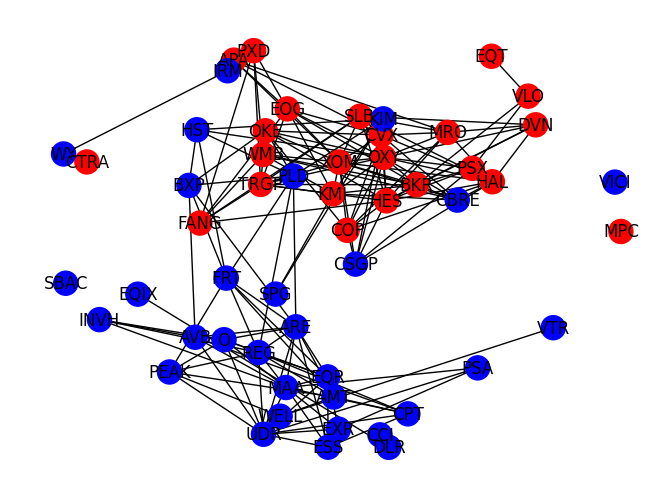

In [60]:
sector_colors = {
    'Energy':'red',
    'Real Estate': 'blue',
}
pos = nx.spring_layout(oil_graph, k=1)
node_colors = [sector_colors[oil_graph.nodes[node]['sector']] for node in oil_graph.nodes()]
nx.draw(oil_graph,pos, labels={node: node for node in oil_graph.nodes()}, node_color=node_colors)

In [145]:

#create graph 
G = nx.Graph() 

for stock in sp500_tickers: 
    G.add_node(stock) 
    
#add links 
for i in range(len(sp500_tickers)): 
    for j in range(i + 1, len(sp500_tickers)):
        stock1 = sp500_tickers[i]
        stock2 = sp500_tickers[j]
        
        # Check if the stock symbols are present in the correlation matrix

        # CHANGED CORRELATION THRESHOLD TO THIS IF BLOCK
        if stock1 in corr_matrix.index and stock2 in corr_matrix.columns:
            correlation_coefficient = corr_matrix.loc[stock1, stock2]
            if not np.isnan(correlation_coefficient) and abs(correlation_coefficient) > 0.7:
                G.add_edge(stock1, stock2, weight=correlation_coefficient)




At visualization
Drawing edges
Done Drawing edges
drawing edge labels
End


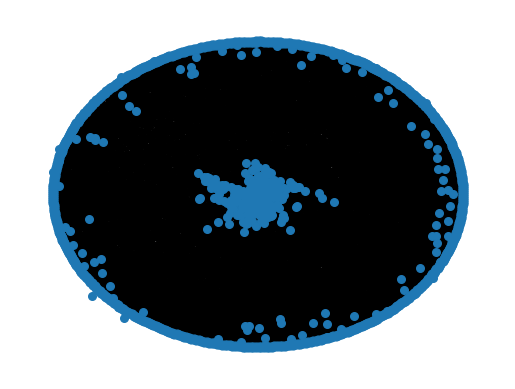

In [146]:
print("At visualization")
#visualization 
#pos = nx.spring_layout(G, seed=42)
pos = nx.spring_layout(G)
# Draw only edges with significant correlation

# I COMMENTED OUT THIS LINE BECAUSE I THINK IT DOES NOTHING
# I MOVOED THE CORRELATION THRESHOLD TO THE PREVIOUS CELL
#edges = [(source, target) for source, target, data in G.edges(data=True) if abs(data['weight']) > 0.5]


# NEED TO FLIP THE WEIGHTS OF THE SPEARMAN
nx.draw_networkx_nodes(G, pos, node_size=30)
#nx.draw_networkx_labels(G, pos, font_size=8)
print("Drawing edges")
#nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='gray')
print("Done Drawing edges")
labels = nx.get_edge_attributes(G, 'weight')
print("drawing edge labels")
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
print("End")
#nx.draw_circular(G, node_size=40)
#nx.draw_kamada_kawai(G, node_size=40)
#nx.draw_spectral(G, node_size=40)
# deg = G.degree()
# to_remove = [n for n in deg if deg[n] == 0]
# G.remove_nodes_from(to_remove)
# nodes_to_remove = [node for node, degree in G.degree() if degree == 0]
# print(nodes_to_remove)
# G.remove_nodes_from(nodes_to_remove)
#G.remove_nodes_from((n for n,d in G.degree_iter() if d == 0))
nx.draw_circular(G, node_size=40)
#plt.show() #its a bullshit hgraph and idk if the coefficient is actually doing anything  useful here


In [147]:
print(G.size()) # edges
print(len(G)) # nodes
degrees = [G.degree(node) for node in G]
print("Average Degree:", np.mean(degrees))

3126
489
Average Degree: 12.785276073619633


In [148]:
degrees = [G.degree(node) for node in G]
print("OG", len(degrees))
degrees = [degree for degree in degrees if degree > 0]
print("MOD", len(degrees))
kmin = min(degrees)
kmax = max(degrees)
print(kmin)
print(kmax)
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

OG 489
MOD 402
1
95


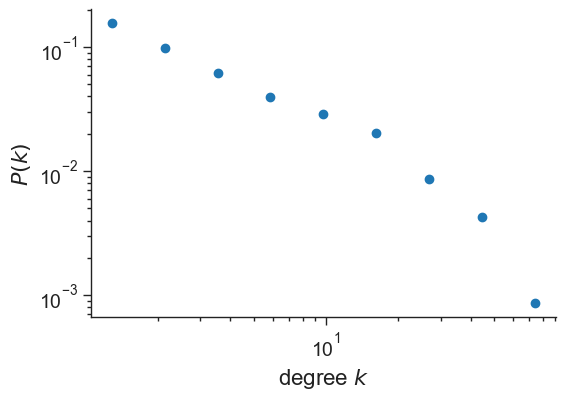

In [149]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
#plt.title(r"Degree Distribution With 0.7 Correlation Threshold")

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

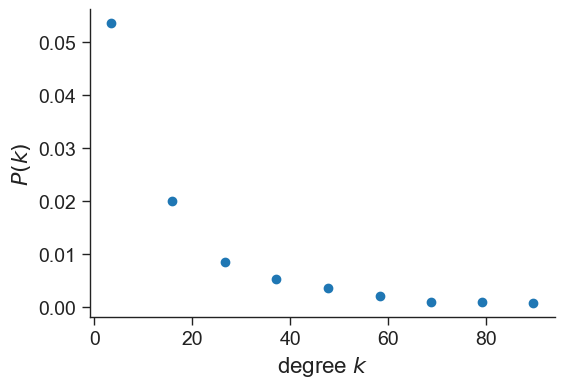

In [150]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
#plt.title(r"Degree Distribution 0.7 Correlation Threshold")

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [54]:
#nx.write_gml(G, '500trialpoint7.gml')

# Null Model

In [151]:
import matplotlib as mpl
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [152]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [157]:
degrees = [G.degree(node) for node in G]
degrees = [degree for degree in degrees if degree > 0]
D = G.copy()
for node in D:
    if G.degree(node) < 1:
            G.remove_node(node)

G_c = np.mean(list(nx.clustering(G).values()))
#G_d = nx.average_shortest_path_length(G)

print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())
print("Average Clustering Coefficient:", G_c)
#print("Average Shortest Path:", G_d)
#plot_degree_dist(D)

Number of Nodes: 402
Number of Edges: 3126
Average Clustering Coefficient: 0.45786809151687263


In [160]:
GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)
clustering_ER = []
short_path_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print("1000 Erdos Renyi networks of same size as network")
print("\tAverage Clustering Coefficient:", np.mean(clustering_ER))
print("\tStandard Deviation of Clustering Coefficient:", np.std(clustering_ER))
print("\tAverage Shortest Path:", np.mean(short_path_ER))
print("\tStandard Deviation of Shortest Path:", np.std(short_path_ER))

1000 Erdos Renyi networks of same size as network
	Average Clustering Coefficient: 0.03878313379388552
	Standard Deviation of Clustering Coefficient: 0.0016059749404617667
	Average Shortest Path: 2.4900937953623403
	Standard Deviation of Shortest Path: 0.01309850695027032


In [162]:
DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=1*G.number_of_edges(),max_tries=1000000)
clustering_DP = []
short_path_DP = []
# ONLY RUNNING 10 TIMES BECAUSE EVEN 100 TIMES WILL TAKE AROUND 20 MINTUES TO COMPUTE
for i in range(10): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=1*G.number_of_edges(),max_tries=1000000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    

print("100 Degree Preservation networks of same size as Dolphin network")
print("\tAverage Clustering Coefficient:", np.mean(clustering_DP))
print("\tStandard Deviation of Clustering Coefficient:",np.std(clustering_DP))

print("\tAverage Shortest Path:", np.mean(short_path_DP))
print("\tStandard Deviation of Shortest Path:", np.std(short_path_DP))

100 Degree Preservation networks of same size as Dolphin network
	Average Clustering Coefficient: 0.17388794715264322
	Standard Deviation of Clustering Coefficient: 0.008865600444884816
	Average Shortest Path: 2.5697299040954826
	Standard Deviation of Shortest Path: 0.0059925323427934265


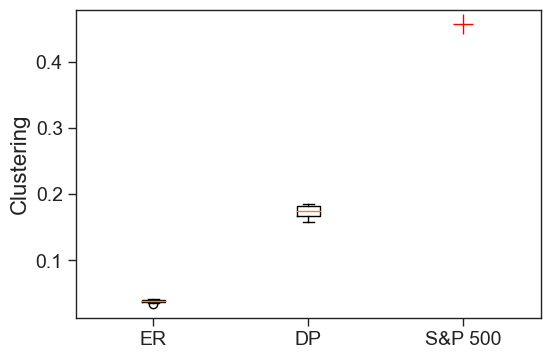

In [163]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,G_c,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','S&P 500'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

# fig = plt.figure(figsize=(6,4))

# plt.boxplot([short_path_ER,short_path_DP], positions=[1,2])
# plt.plot(3,G_d,'r',marker='+',markersize=15)
# ax = plt.gca()
# ax.set_xticks([1,2,3],labels=['ER','DP','S&P 500'])
# plt.ylabel('Average shortest path')
# plt.xlim([0.5,3.5])
# plt.show()